# Tobacco Documents Classification

# Mathieu VANDECASTEELE - MASTER SID 2018-2019

## Université de Rouen

Joint à ce rapport : scripts Python

In [1]:
from script import *

Ce document a pour but de rapporter l'étude de la classification des types des différents documents émis lors des procès contre les industries du tabac aux États-Unis.

Plan de l'étude :
* Description statistique et analyse du jeu de données
* Découpe / Préparation / Pré-Traitement des données
* Apprentissages de classifieurs
* Conclusion, dernières analyses et Pistes d'amélioration

# 1. Analyse des données

### Premières statistiques

L'État américain a collecté plus de 14 millions de documents, ici nous disposons d'un échantillon de 3482 éléments précisemment. 
Nous devons établir un classifieur de documents, nous avons 10 types différents à différenciers : Email, Advertisement, Form, Letter, etc.
Première constatation dans un premier temps : 3482 données ce n'est pas beaucoup, cela pourra plus tard poser des problèmes, surtout pour une classification multi-classes.


Nous disposons comme données d'un .csv avec l'image_path et le label associé pour chacune. Nous disposons également des textes de ces images obtenus par OCR.

In [2]:
# Premiers Import nécessaires et Import des données.
import pandas as pd
csv_path = 'tobacco-lab/data/Tobacco3482.csv'
data = pd.read_csv(csv_path, sep = ",")

On vérifie avec .describe() si on a bien 3482 données et s'il ya bien 10 labels différents :

In [3]:
data.describe(include='all')

,img_path,label
count,3482,3482
unique,3482,10
top,Advertisement/04412344.jpg,Memo
freq,1,620


Il semble y avoir 3482 éléments également contenus dans les dossiers de textes obtenus par OCR donc on a pas de problèmes de cohérences de nombres de données entre le .csv et ces dernières.

### Répartition des données

Analysons la répartition des données avec quelques statistiques descriptives. Tout d'abord piochons 10 données au hasard pour établir une première observation :


In [4]:
data.sample(10)

,img_path,label
848,Form/2023182617.jpg,Form
1980,Memo/2020268309.jpg,Memo
1212,Form/520940677+-0677.jpg,Form
1838,Memo/0000083559.jpg,Memo
485,Email/2081933672.jpg,Email
3010,Report/513206103+-6103.jpg,Report
1156,Form/2505365152.jpg,Form
2532,News/2025382018.jpg,News
2026,Memo/2025851048_2025851049.jpg,Memo
1172,Form/505852586_505852607.jpg,Form


Il semble y avoir plus d'emails que d'autres types de documents dans notre jeu de données. On note aussi en relançant la commande que pas mal de lettres ou encore de memos sont présents. Avons-nous une sur-représentation d'une ou plusieurs classe(s) particulière(s) ?

On peut tracer le diagramme bâtons du nombre de documents par type de documents :

Memo             620
Email            599
Letter           567
Form             431
Report           265
Scientific       261
Advertisement    230
Note             201
News             188
Resume           120
Name: label, dtype: int64


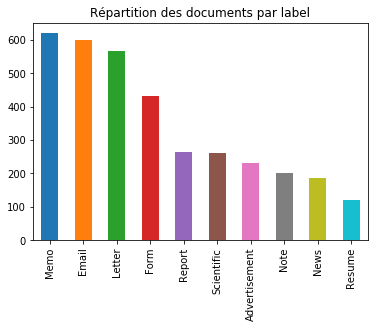

In [5]:
repartition_numbers = data['label'].value_counts()
print(repartition_numbers)
repartition_numbers.plot.bar(title = 'Répartition des documents par label')

Nous avons bel et bien 4 classes supérieures en nombre de données aux autres mais nous ne pouvons pas vraiment parler de sur-représensation.
Le nombre de données restant globalement faible, si les résultats après apprentissage automatique de classifieurs ne sont pas satisfaisants, il faudrait augmenter ce nombre : avec de l'augmentation de données par exemple.

### Statistiques Textuelles sur les classes

À partir des données OCR, **étudions le nombre de mots moyens par type de document :**

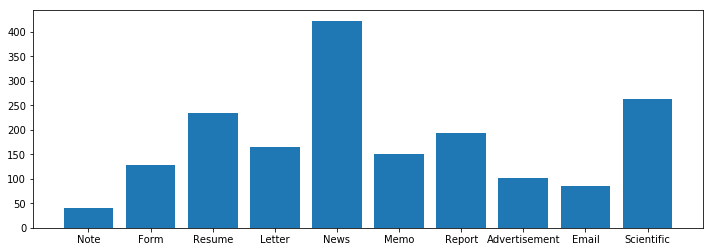

In [6]:
dictionnary_word_average_number = count_average_number_of_words_per_class('tobacco-lab/data/Tobacco3482-OCR/')
plt.figure(figsize=(12,4))
plt.bar(range(len(dictionnary_word_average_number)), list(dictionnary_word_average_number.values()), align='center')
plt.xticks(range(len(dictionnary_word_average_number)), list(dictionnary_word_average_number.keys()))
plt.show()

# 2. Pre-Processing et Découpe

In [7]:
data = organize_and_split_data(csv_path)
X_train = data[0]
X_val = data[1]
X_test = data[2]
y_train = data[3]
y_val = data[4]
y_test = data[5]

taille de X : 3482
taille de y : 3482
taille de X_train : 2089
taille de X_val : 696
taille de X_test : 697
taille de y_train : 2089
taille de y_val : 696
taille de y_test : 697


# 3. Tokenization et Entraînements

In [15]:
datasets_tokenized_idf = tokenizing_and_tfidf(X_train,X_test,2000)
X_train_tf = datasets_tokenized_idf[0]
X_val_tf = datasets_tokenized_idf[1]
X_test_tf = datasets_tokenized_idf[2]

Tokenization...
Terminé !
Taille du vocabulaire :
2000
TFIDF...
Terminé !


In [16]:
first_muNB = my_MultinomialNB(X_train_tf,X_val_tf,X_test_tf,y_train,y_val,y_test)

Entraînement...
Terminé !
Evaluation par Cross-Validation (5) avec alpha = 1.0 :
0.5676747787033614
Précision/Score sur les données de Test : 
0.6714490674318508

Matrice de Confusion :
[[ 14   0   1   0   0   2   1   0   0   0]
 [  0 126   1   1   3   1   3   0   0   0]
 [ 14   0  71   0   1   5  21   2   0  10]
 [  4   4   5  91  13  11   5  10   0   3]
 [ 12   6   5  30 101   2  11  18   0  16]
 [  1   0   0   0   0  17   0   1   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   1   0   2   0   1]
 [  0   0   0   0   0   0   0   0  23   0]
 [  0   0   0   1   0   1   0   2   0  23]]

Rapport de classification :
              precision    recall  f1-score   support

           0       0.31      0.78      0.44        18
           1       0.93      0.93      0.93       135
           2       0.86      0.57      0.69       124
           3       0.74      0.62      0.68       146
           4       0.86      0.50      0.63       201
           5       0.42      

## Optimisation des Hyperparamètres :

In [21]:
from sklearn.model_selection import GridSearchCV, PredefinedSplit
from sklearn.pipeline import Pipeline
from pprint import pprint
from time import time
import logging

logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')

pipeline = Pipeline([
    ('vector', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])

parameters = {
    'vector__max_df': (0.1, 0.2, 0.5,0.6, 0.7, 0.75, 0.8),
    'vector__max_features' : (500, 1000, 1500, 2000),
    'clf__alpha': (0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1.0)
}
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=2, cv=3)

print("Grid Search ...")
print("pipeline:", [name for name, _ in pipeline.steps])
print("paramètres:")
pprint(parameters)
t0 = time()
grid_search.fit(X_train, y_train)
print("Terminé en %0.3fs" % (time() - t0))
print()

print("Meilleur score: %0.3f" % grid_search.best_score_)
print("Meilleurs paramètres : ")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search...
pipeline: ['vector', 'tfidf', 'clf']
parameters:
{'clf__alpha': (0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1.0),
 'vector__max_df': (0.1, 0.2, 0.5, 0.6, 0.7, 0.75, 0.8),
 'vector__max_features': (500, 1000, 1500, 2000)}
Fitting 3 folds for each of 196 candidates, totalling 588 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   58.4s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 588 out of 588 | elapsed:  3.6min finished


done in 216.436s

Best score: 0.703
Best parameters set:
	clf__alpha: 0.2
	vector__max_df: 0.7
	vector__max_features: 1000
